In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#code for the entire graph

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
from multiprocessing import Pool
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [5]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)

In [6]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [7]:
groupDf = df[['user_id', 'Toxicity','week','month']]

In [8]:
users_list = list(groupDf['user_id'].unique().astype(str))

In [9]:
G2 = G.subgraph(users_list)

In [10]:
print(G.number_of_edges())
print(G.number_of_nodes())
print(G2.number_of_edges())
print(G2.number_of_nodes())

2194979
100386
1161596
59848


In [26]:
def get_neighbour_toxicity_mean(user):
  neighbours = list(G2.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = groupDf[groupDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)

In [27]:
def get_user_toxicity_mean(user):
  userDf = groupDf[groupDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()

In [28]:
user_toxicity_means = []
neighbor_toxicity_means = []

In [ ]:
for user in G2.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)

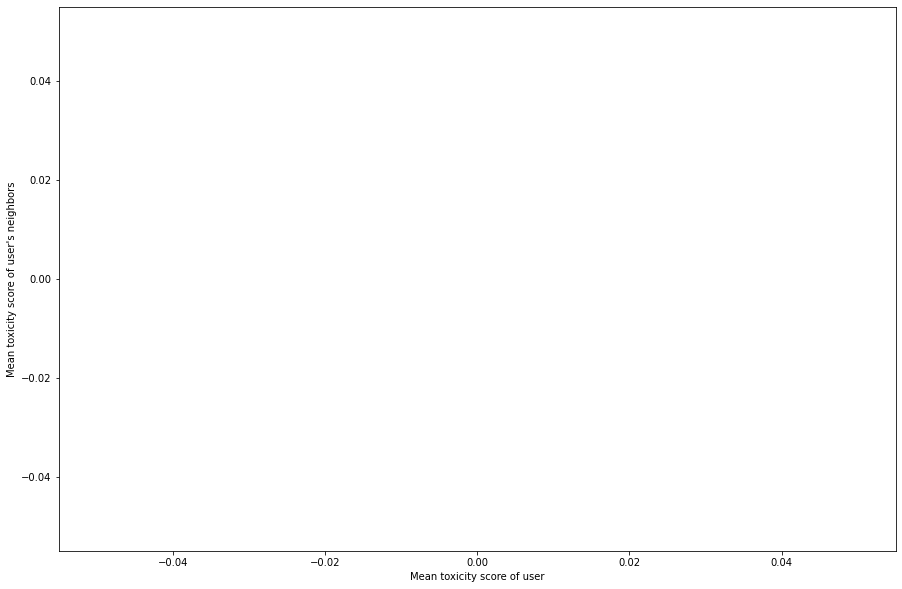

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

# plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks([i/10 for i in range(0, 11)])
plt.show()

In [31]:
# num_processes = 4
# pool = Pool(num_processes)
# results = pool.map(compute_user_stats, G2.nodes())
# pool.close()
# # extract the results into separate lists
# user_toxicity_means, neighbor_toxicity_means = zip(*results)

In [32]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)

G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')
groupDf = df[['user_id', 'Toxicity','week','month']]
users_list = list(groupDf['user_id'].unique().astype(str))
G2 = G.subgraph(users_list)

def get_neighbour_toxicity_mean(user):
  neighbours = list(G2.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = groupDf[groupDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)

def get_user_toxicity_mean(user):
  userDf = groupDf[groupDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()

user_toxicity_means = []
neighbor_toxicity_means = []

for user in G2.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)

plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

# plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks([i/10 for i in range(0, 11)])
plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.ticker as ticker\nimport numpy as np\nfrom datetime import datetime\nimport networkx as nx\nimport warnings\nwarnings.filterwarnings("ignore")\n\ndf = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")\ndf["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))\ndf["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))\ndf["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)\n\nG = nx.read_edgelist(\'/content/gdrive/My Drive/users.edgelist\')\ngroupDf = df[[\'user_id\', \'Toxicity\',\'week\',\'month\']]\nusers_list = list(groupDf[\'user_id\'].unique().astype(str))\nG2 = G.subgraph(users_list)\n\ndef get_neighbour_toxicity_mean(user):\n  neighbours = list(G2.neighbors(user))\n  temp_list = []\n  for neigh in neighbours:\n    neighbourDf = grou